In [ ]:
# task 1
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D

img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(4, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 4)         20        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 8)         296       
                                                                 
 flatten (Flatten)           (None, 968)               0         
                                                                 
 dense (Dense)               (None, 3)                 2907      
                                                                 
Total params: 3,223
Trainable params: 3,223
Non-trainable params: 0
______________________________________________________

Epoch 1/3
4/4 [==============================] - 4s 282ms/step - loss: 23.5048 - accuracy: 0.2250 - val_loss: 3.3709 - val_accuracy: 0.4000
Epoch 2/3
4/4 [==============================] - 0s 87ms/step - loss: 6.1953 - accuracy: 0.4500 - val_loss: 5.8321 - val_accuracy: 0.5000
Epoch 3/3
4/4 [==============================] - 0s 102ms/step - loss: 3.5247 - accuracy: 0.6000 - val_loss: 2.2517 - val_accuracy: 0.7000


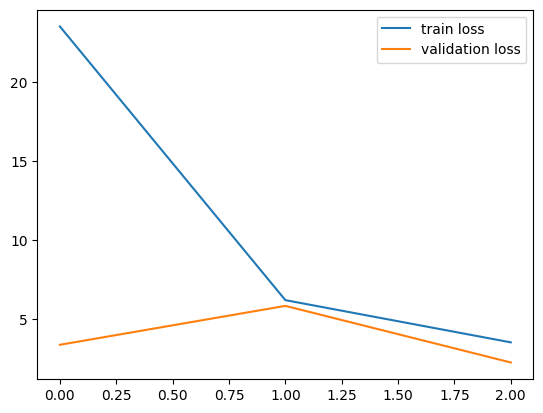

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)

training = model.fit(train_data, train_labels, epochs=3, batch_size=10, validation_split=0.2,
                     callbacks=[checkpoint])

history = training.history

plt.plot(history['loss'], label='train loss');
plt.plot(history['val_loss'], label='validation loss');
plt.legend();

In [ ]:
model.load_weights('weights.hdf5')

print(np.argmax(model.predict(test_data), axis=-1))
print(test_labels)

1/1 [==============================] - 0s 105ms/step
[2 1 0 1 1 2 2 2 1 1]
[[0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]


In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

model.add(Dropout(0.2))
         
model.add(Conv2D(5, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 dropout (Dropout)           (None, 27, 27, 15)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 5)         305       
                                                                 
 flatten_1 (Flatten)         (None, 3380)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 10143     
                                                                 
Total params: 10,523
Trainable params: 10,523
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))

model.add(BatchNormalization())

model.add(Conv2D(5, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 15)       60        
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 5)         305       
                                                                 
 flatten_2 (Flatten)         (None, 3380)              0         
                                                                 
 dense_2 (Dense)             (None, 3)                 10143     
                                                                 
Total params: 10,583
Trainable params: 10,553
Non-trainable params: 30
_________________________________________________

In [ ]:
model = Sequential()

model.add(Conv2D(5, kernel_size=2, activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(15, kernel_size=2, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint('weights_fasion.hdf5', monitor='val_loss', save_best_only=True)

model.fit(train_data, train_labels, epochs=3, validation_split=0.2, batch_size=10,
          callbacks=[checkpoint]);

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 5)         25        
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 15)        315       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 15)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2535)              0         
                                                                 
 dense_3 (Dense)             (None, 3)                 7608      
                                                                 
Total params: 7,948
Trainable params: 7,948
Non-trainable params: 0
____________________________________________________

In [ ]:
model.load_weights('weights_fasion.hdf5')

c1 = model.layers[0]

weights1 = c1.get_weights()

kernel = weights1[0][..., 0, 0]
print(kernel)
print(kernel.shape)

[[-0.13242659 -0.40619496]
 [-0.32817864  0.16279899]]
(2, 2)


In [ ]:
# помогло в улучшения работы нейронной сети - Dropout, Batch Normalization

# task 2 
# Обзор статьи https://arxiv.org/abs/2006.11239 во вложении